# Lee Jae Yeol
# 20308109
# Math 4432 Assignment1
# Ch3 Q8

In [100]:
install.packages("ISLR")
library(ISLR)
library(MASS)
data(Auto)

Warning message:
"package 'ISLR' is in use and will not be installed"

In [325]:
fit = lm(mpg~ horsepower, data = Auto)
summary(fit)


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


## a)
### i) Is there a relationship between the predictor and the response?
The F-statistic p value for the variable horsepower is less than 2.2e-16 so we can reject the 
null hypothesis. The negative value in the coefficient indicaties a negative correlation.

### ii) How strong is the relationship between the predictor and the response?

To determine the strength of the relationship, we look at the R squared value. R^2 = 0,6059 suggests that 60% of the variablity in 'mgp' is explained with the variable 'horsepower.' Also, the mean of 'mpg' divided by the RSE is equal to 4.906 / mean(Auto$mpg) = 0.209247508377943.


### iii)Is the relationship between the predictor and the response positive or negative?

As mentioned in i), negative value in the coefficient of 'horespower' indicates a negative correlation.


### iv) What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals?

The predictid mpg is coef(fit)[1] +coef(fit)[2] * 98  = 24.467

confidence interval
fit	lwr	upr
24.46708	23.97308	24.96108

prediction interval
fit	lwr	upr
24.46708	14.8094	34.12476




In [208]:
## ii)
4.906/mean(Auto$mpg) 

## iv)
predict(fit, data.frame(horsepower =98))
predict(fit, data.frame(horsepower= 98), interval = 'confidence')
predict(fit, data.frame(horsepower= 98), interval = 'prediction')

[1] 0.2092475

1 
24.46708

fit,lwr,upr
24.46708,23.97308,24.96108


fit,lwr,upr
24.46708,14.8094,34.12476


## b) 
Plot the response and the predictor. Use the abline() function
to display the least squares regression line.

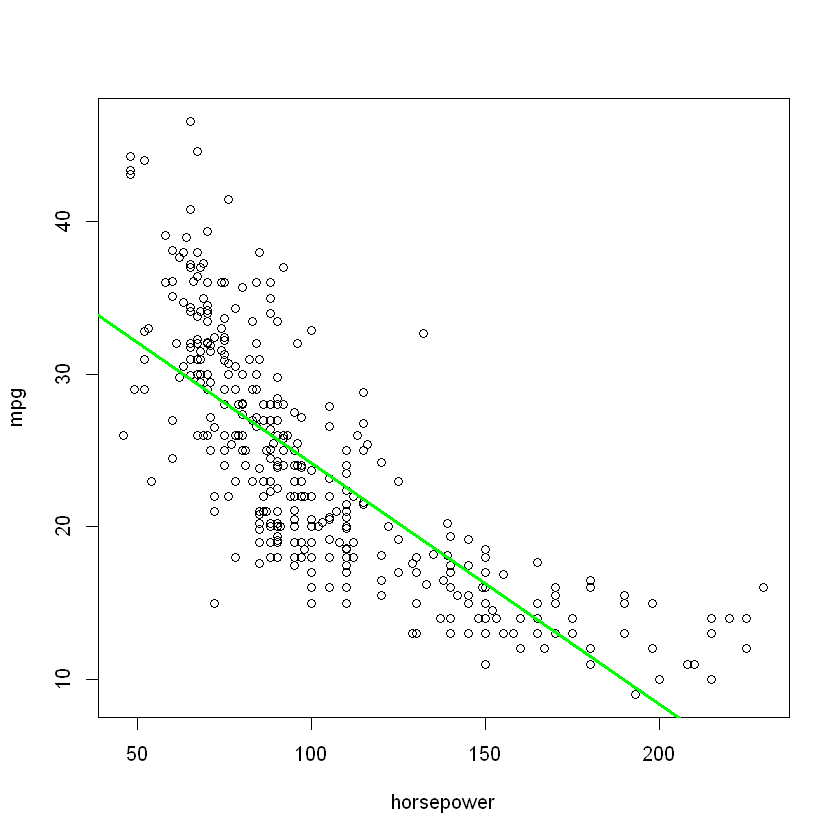

In [326]:
plot(Auto$horsepower, Auto$mpg, xlab ="horsepower", ylab = "mpg") 
abline(fit, lwd =3, col = 'green')

## c) 
Use the plot() function to produce diagnostic plots of the least
squares regression fit. Comment on any problems you see with
the fit.

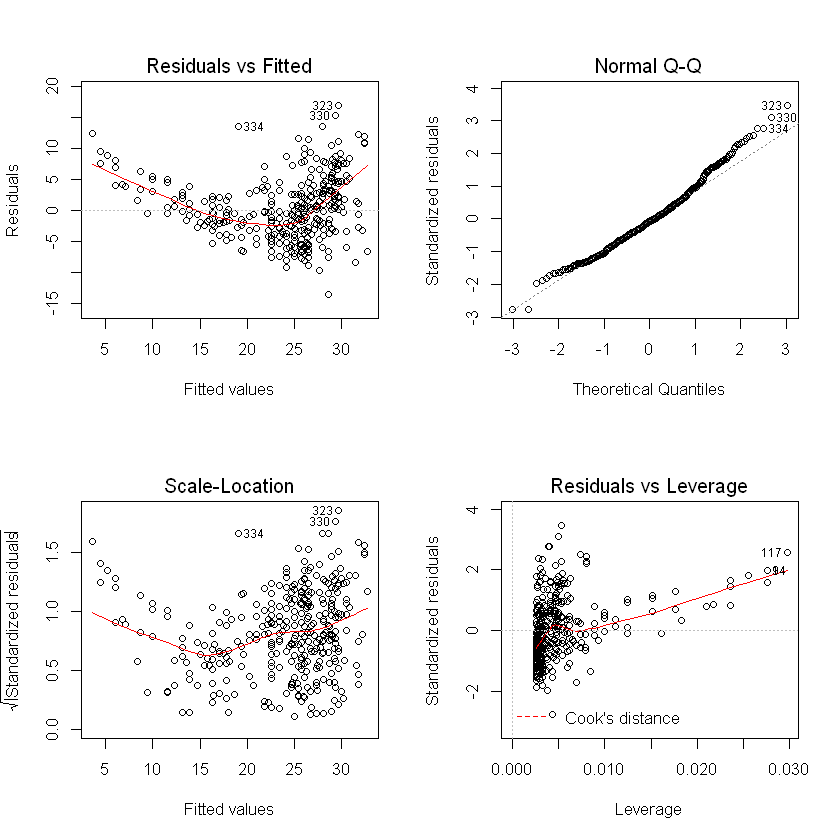

In [78]:
par(mfrow = c(2,2))
plot(fit)

The strong patterns in the residual vs fitted function shows non linearity among the two. 
There also seems to be some outliers and leverage points, especially for data points 94 and 117. 

# CH3 Q9

(a) Produce a scatterplot matrix which includes all of the variablesin the data set.

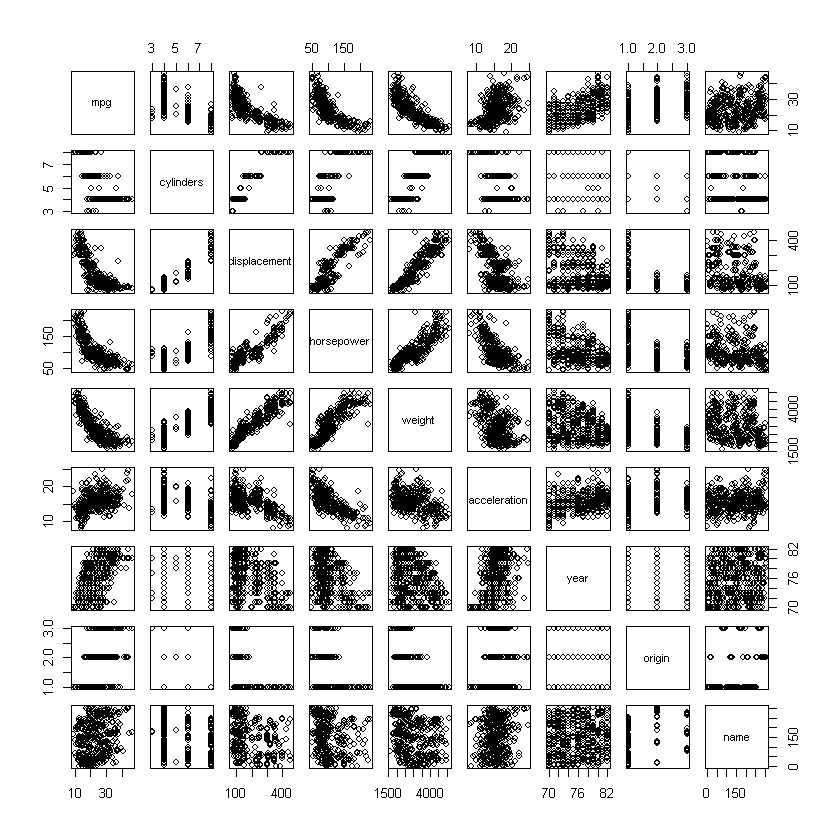

In [81]:
pairs(Auto)

(b) Compute the matrix of correlations between the variables using
the function cor(). You will need to exclude the name variable,
cor() which is qualitative.

In [89]:
cor(Auto[1:8])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


(c) Use the lm() function to perform a multiple linear regression
with mpg as the response and all other variables except name as
the predictors. Use the summary() function to print the results.
Comment on the output. For instance: <br>
i. Is there a relationship between the predictors and the response? <br>
ii. Which predictors appear to have a statistically significant
relationship to the response? <br>
iii. What does the coefficient for the year variable suggest?

In [92]:
lm.fit = lm(mpg~.-name, data= Auto)
summary(lm.fit)


Call:
lm(formula = mpg ~ . - name, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


i) To find the relationship between the predictors and the response variable, we look at the F statistics p value which is less than 2.2e-16. Therefore, we can conclude that there exists a relationship.

ii) To sort out the significant predictors for the response variable, we look at each predictor variable's t statistics p value. The ones that have asterisk, which are displacement, weight, year and origin have significant p values. These are the variables that appear to have a statistically significant relationship to the response variable.

iii) The coefficient for the variable year is 0.750773 showing quite a strong positive relation to the response variable. In other words, the average effect of 1 year makes a 0.750773 increase to the mpg variable.

(d) Use the plot() function to produce diagnostic plots of the linear
regression fit. Comment on any problems you see with the fit.
Do the residual plots suggest any unusually large outliers? Does
the leverage plot identify any observations with unusually high
leverage?

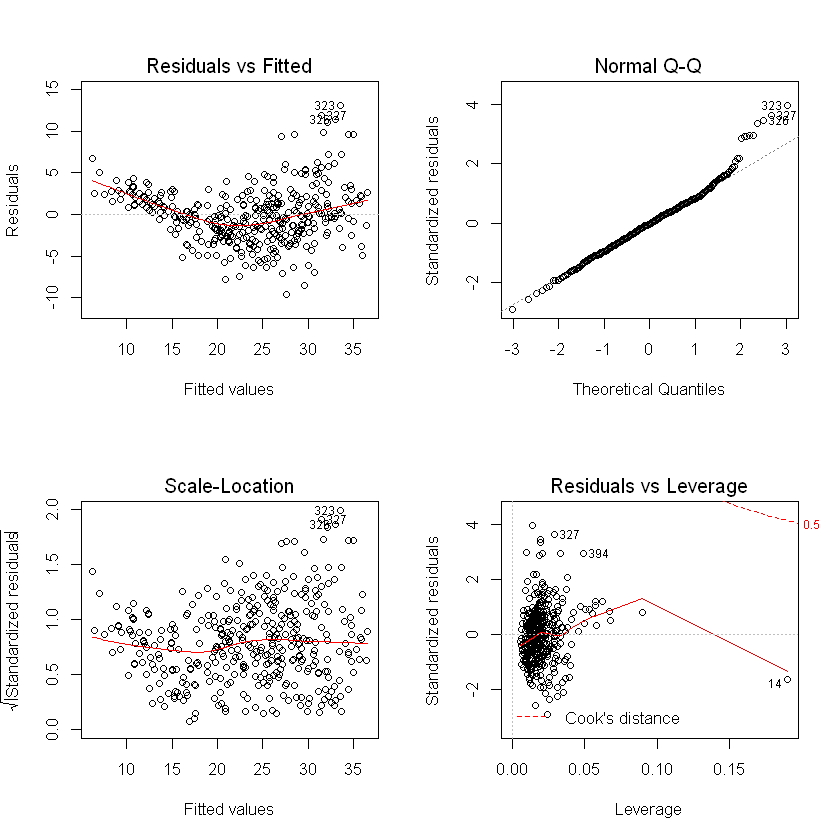

In [94]:
par(mfrow = c(2,2))
plot(lm.fit)

There is a very high leverage point(14) but just one. Non linearity pattern seems to be moderate. 

(e) Use the * and : symbols to fit linear regression models with
interaction effects. Do any interactions appear to be statistically
significant? <br>
I picked two sets of variables that show the highest correlation (cylinders, displacement) and (displacement, weight). 

In [315]:
lm.fit = lm(mpg~ cylinders *displacement + displacement * weight, data = Auto)
summary(lm.fit)


Call:
lm(formula = mpg ~ cylinders * displacement + displacement * 
    weight, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.2934  -2.5184  -0.3476   1.8399  17.7723 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             5.262e+01  2.237e+00  23.519  < 2e-16 ***
cylinders               7.606e-01  7.669e-01   0.992    0.322    
displacement           -7.351e-02  1.669e-02  -4.403 1.38e-05 ***
weight                 -9.888e-03  1.329e-03  -7.438 6.69e-13 ***
cylinders:displacement -2.986e-03  3.426e-03  -0.872    0.384    
displacement:weight     2.128e-05  5.002e-06   4.254 2.64e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.103 on 386 degrees of freedom
Multiple R-squared:  0.7272,	Adjusted R-squared:  0.7237 
F-statistic: 205.8 on 5 and 386 DF,  p-value: < 2.2e-16


Displacement and weight have a significant p-value, concluding that the interaction between them are strong. The other pair's p-value turns out to be insignificant.

(f) Try a few different transformations of the variables, such as
log(X),√X, X2. Comment on your findings.

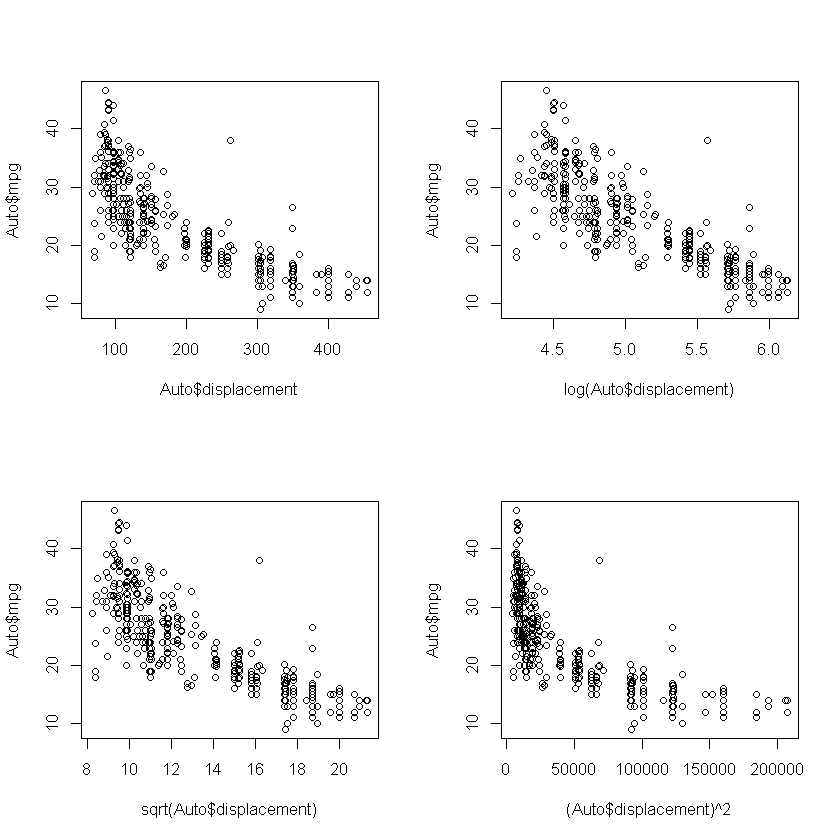

In [322]:
par(mfrow = c(2,2))
plot(Auto$displacement, Auto$mpg) 
plot(log(Auto$displacement), Auto$mpg) 
plot(sqrt(Auto$displacement), Auto$mpg) 
plot((Auto$displacement)^2, Auto$mpg) 

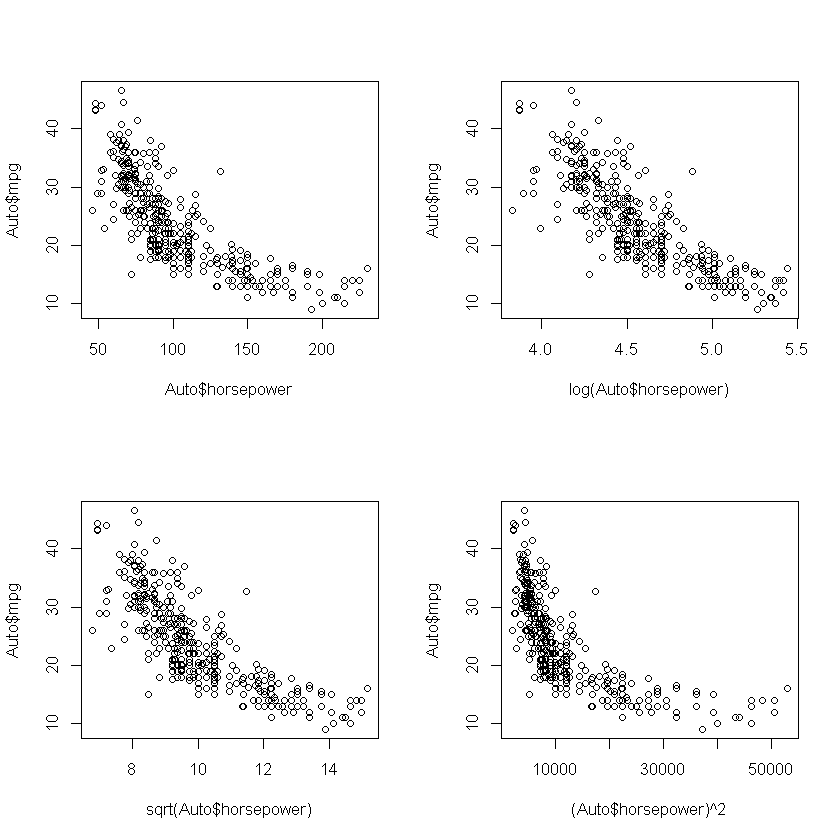

In [323]:
par(mfrow = c(2, 2))
plot(Auto$horsepower, Auto$mpg)
plot(log(Auto$horsepower), Auto$mpg)
plot(sqrt(Auto$horsepower), Auto$mpg)
plot((Auto$horsepower)^2, Auto$mpg)

From both of the variables, the log transformation seems to be the most effective in making the plot linear. 